![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 2: Regression Modeling and Bacteria Growth

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML


### Import Libraries

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import warnings

<hr style="height:2pt">

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### /Wang Dorjee Sherpa/ Rovina add your full name


<div class="theme"> <h1>Overview and Data Description</div> </h1>

### Predicting percentage change in multiple bacteria populations given their spreading factor.


In this homework, we will mainly explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



 ### Problem Description

Given the bacteria data, we will try to predict the percentage change 
in population giving the spreading factor. 
Based on the data visualisation we can see that there seems to be a 
non-linear relationship between the 2 variables. For this exercise we 
will consider the `Spreading_factor` to be our predictor variable 
and `Perc_population` to be our response variable. 
We will fit a polynomial regression model for a specified degree that 
computes the respective degree predictors to fit a model on the 
training set which will be evaluated on the test set. 
The performance of the models should be evaluated using their $MSE$.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 1 </h2>    <br />

<b> Question 1:   Data Visualization [10 points total]</b>
    <br /><br />
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage` 
change on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 
<br /><br />
**1.2** [4 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Solutions

### 1.1

In [3]:
df = pd.read_csv('data/bacteria_train.csv')
df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


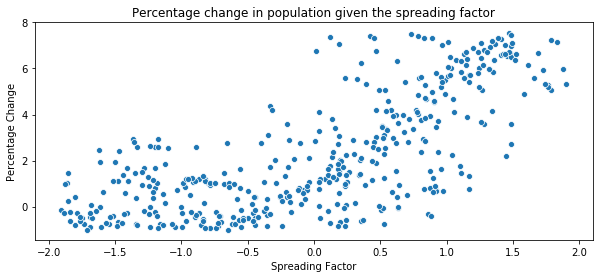

In [4]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Spreading_factor', y='Perc_population', data=df)
plt.title("Percentage change in population given the spreading factor")
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.show()

### 1.2

**There is a non linear trend between the spreading factor and  percentage change.**

### Solution Roadmap 

The following figure will give a brief idea of the concepts that are covered in the following sections of this homework.


![](fig/soln-roadmap.png)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2 style="color:black;background-color:#E7F4FA"> Part 2 </h2>    <br />
<b> Question 2:   Model Building: Guesstimate the non-linear relationship [10 points total]</b>
<br /><br />
<b>2.1</b> [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
<br />
- Fit a polynomial regression on the training set.
<br />
- Compute the mean_squared_error on the test set.
<br />
- Plot a graph that displays the true data and the predicted data.
<br />

    
**Hints**
<br />
- Try guesstimating with different degrees
<br /><br />
<b> Why this maybe a good idea? </b>
<br />
- This can help you get a quick baseline
<br />
- The exercise will help you understand the relationship between the variables of the dataset
<br /><br />
<b> Why this maybe a bad idea?</b>
<br />
- Not a robust method because it's based on your guess
<br />
- It may lead you to make unjustified assumptions
    
    
</div>


### Solutions

### 2.1

In [5]:
# Make a global dictionary to save the MSE values
test_mse_dict = {}

In [6]:
# Read the data 
train_df = pd.read_csv('data/bacteria_train.csv')
test_df = pd.read_csv('data/bacteria_test.csv')

In [7]:
# Select predictor and response variable on both train and test set
x_train = train_df[['Spreading_factor']]
y_train = train_df.Perc_population

x_test = test_df[['Spreading_factor']]
y_test = test_df.Perc_population 

In [8]:
#Guesstimate degree of the curve
degree = 10
# transform dta using PolynomialFeatures
x_train_poly = PolynomialFeatures(degree).fit_transform(x_train)
x_test_poly = PolynomialFeatures(degree).fit_transform(x_test)


In [9]:
# Fit linear regression with a guessed degree
poly_reg = LinearRegression(fit_intercept=False)
poly_reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [10]:
#Compute the mean_squared_error on the test set and name it mse 

# predict on x_test_poly
y_preds = poly_reg.predict(x_test_poly)
# calculate mse
mse = mean_squared_error(y_test, y_preds)

print(f"The mse on  test set with polynomial degree {degree} is {mse:.4f}")

The mse on  test set with polynomial degree 10 is 2.6280


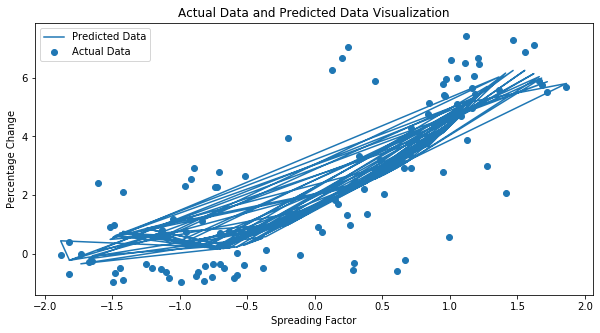

In [11]:
# Plot the actual data and predicted data

plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test, label="Actual Data")
plt.plot(x_test, y_preds, label="Predicted Data")
plt.title("Actual Data and Predicted Data Visualization")
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.legend()
plt.show()

In [12]:
# add prediction to the test dataset and sort using prediction
test_df['Prediction'] = y_preds
test_df = test_df.sort_values(by='Prediction')

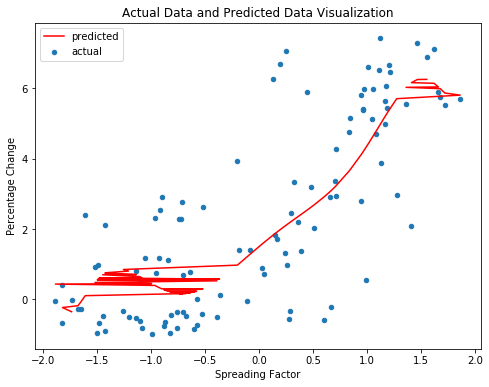

In [13]:
fig = plt.figure(figsize=(8, 6))
fig.clf()
ax = fig.gca()
test_df.plot(kind = 'scatter', x = 'Spreading_factor', y = 'Perc_population', ax = ax, label="actual")
test_df.plot(kind = 'line', x = 'Spreading_factor', y = 'Prediction', color='r', ax =ax, label="predicted")
ax.set_ylabel("Percentage Change")
ax.set_xlabel("Spreading Factor")
ax.set_title("Actual Data and Predicted Data Visualization")
ax.legend()
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 3 </h2>    <br /><br />

<b> Question 3:   Use a validation set to find the most promising non-linear relationship [12 points total]</b>
<br />
**3.1** [4 pts] Take out a small fraction of the training set for **validation**.<br /><br />
- For each degree of the polynomial<br />
     - Fit a polynomial regression on the training set.<br />
     - Calculate the mean_squared_error ($MSE$) on the *validation set*.<br />
    
- Compare the values of the validation set, and select the degree for which the validation error is the least.<br />
- Plot the train and validation MSE for each degree.
<br />

**Hints**<br />
- Limit the maximum degree to 50.<br />
- Limit the number of bootstraps to 100.<br />
- Use sklearn cross_validate() to perform cross validation.<br /><br />

**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set). 
Compute the $MSE$ on the test set.
<br />
Plot the true data and the predicted data.<br /><br />
**3.3** [4 pts] Compute the confidence intervals  for the coefficients for the beta distribution and plot it. This is similar to the one you have done in the exercise.
<br /><br />

<b>Why this maybe a good idea? </b>
<br />
- Better than guesstimates<br />
- Now you can compare models & make a more informed decision<br />
- Still quick, & more reliable<br /><br />

<b> Why this maybe a bad idea? </b>

<br />
- Still not a robust method because it depends on the choice of the validation set
<br /><br />
</div>  
                                                                                                                                 

### Solutions

### 3.1

In [14]:
# your code here
# reading the data
train_df = pd.read_csv('data/bacteria_train.csv')
x = train_df[['Spreading_factor']]
y = train_df.Perc_population

In [15]:
# split the train data into train and validation sets 
# with 80% of the data as the train data and random_state=121
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 121)

In [16]:
# your code here
#selecting max degree
max_degree = 50
test_mse_dict = {}

# create a list to save training and validation error
train_error, validation_error = [], []

for d in range(1, max_degree):
    x_train_poly = PolynomialFeatures(d).fit_transform(x_train)
    x_val_poly = PolynomialFeatures(d).fit_transform(x_val)
    
    # fitting polynomial regression
    preg = LinearRegression(fit_intercept=False)
    preg.fit(x_train_poly, y_train)
    # predicting on train_set
    y_train_pred  = preg.predict(x_train_poly)
    y_val_pred = preg.predict(x_val_poly)
    
    # calculate mse on train and validation set
    training_mse = mean_squared_error(y_train, y_train_pred)
    validation_mse = mean_squared_error(y_val, y_val_pred)
    
    # append the training and validation errors
    train_error.append(training_mse)
    validation_error.append(validation_mse)
    
    # keep track of degree and mse
    test_mse_dict[d] = validation_mse

The best degree that has the lowest validation mse is: [8]


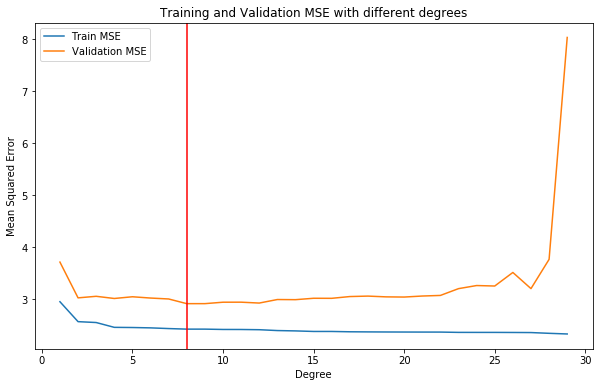

In [17]:
# your code here
# getting the best degree that has the lowest validation mse
best_degree = [d for d in test_mse_dict if test_mse_dict[d] == min(test_mse_dict.values())]
print(f"The best degree that has the lowest validation mse is: {best_degree}")

# plotting training and validation mse with all the degrees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), train_error[:29], label="Train MSE")
plt.plot(range(1, 30), validation_error[:29], label="Validation MSE")
plt.axvline(best_degree[0], color='red')
plt.title("Training and Validation MSE with different degrees")
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [18]:
# Print the train and validation MSE along with the degree of the best model. 
# To do this find the degree that gives the lowest MSE.
# your code here
print(f"Degree of the best model: {best_degree[0]}")
print(f"Train MSE with best degree: {train_error[best_degree[0]-1]}")
print(f"Validation MSE with best degree: {validation_error[best_degree[0]-1]}")

Degree of the best model: 8
Train MSE with best degree: 2.4286913285586915
Validation MSE with best degree: 2.9179267521200223


### 3.2

In [19]:
# assign training and test set
x_train = train_df[['Spreading_factor']]
y_train = train_df.Perc_population

x_test = test_df[['Spreading_factor']]
y_test = test_df.Perc_population

# transform training and test set with best polynomial degree found above
x_train_poly = PolynomialFeatures(8).fit_transform(x_train)
x_test_poly = PolynomialFeatures(8).fit_transform(x_test)

In [20]:
# create and object of linear regression
poly_reg = LinearRegression(fit_intercept=False)
# fit the model
poly_reg.fit(x_train_poly, y_train)
# predict on test set
y_preds = poly_reg.predict(x_test_poly)
# calculate mean squared error on test set
test_mse = mean_squared_error(y_test, y_preds)

# print test mse
print(f"Test MSE with degree 8: {test_mse}")

Test MSE with degree 8: 2.613010637353005


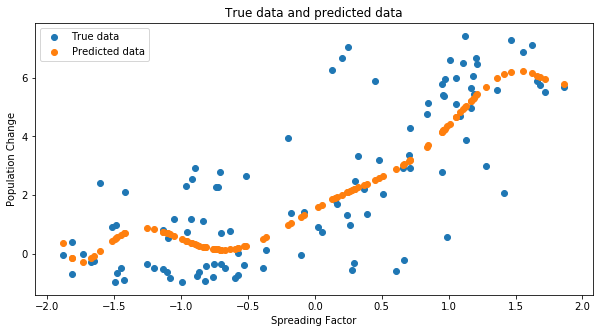

In [21]:
# plot true data and predicted data
plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test, label="True data")
plt.scatter(x_test, y_preds, label="Predicted data")
plt.title("True data and predicted data")
plt.xlabel("Spreading Factor")
plt.ylabel("Population Change")
plt.legend()
plt.show()

### 3.3

In [22]:
# calculate and plot confidence interval
# create a bootstrap function
def bootstrap(df):
    indices = np.random.randint(len(df), size=len(df))
    new_df = df.iloc[indices]
    return new_df

# create a list of beta values using 200 bootstrap
beta0_list, beta1_list = [], []

bootstraps = 200

for i in range(bootstraps):
    df_new = bootstrap(df)
    
    # calculating mean of predictor and response variable
    xmean = df_new.Spreading_factor.mean()
    ymean = df_new.Perc_population.mean()
    
    beta1 = (((df_new.Spreading_factor - xmean)*(df_new.Perc_population - ymean)).sum())/(((df_new.Spreading_factor - xmean)**2).sum())
    beta0 = ymean - (beta1*xmean)
    
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    
# sort the beta lists in ascending
beta0_list.sort()
beta1_list.sort()

# calculate 95% confidence interval
beta0_ci = (np.percentile(beta0_list, 2.5), np.percentile(beta0_list, 97.5))
beta1_ci = (np.percentile(beta1_list, 2.5), np.percentile(beta1_list, 97.5))

# display confidence intervals
print(f"The beta0 confidence interval is {np.round(beta0_ci, 3)}")
print(f"The beta1 confidence interval is {np.round(beta1_ci, 3)}")

The beta0 confidence interval is [2.082 2.399]
The beta1 confidence interval is [1.684 1.98 ]


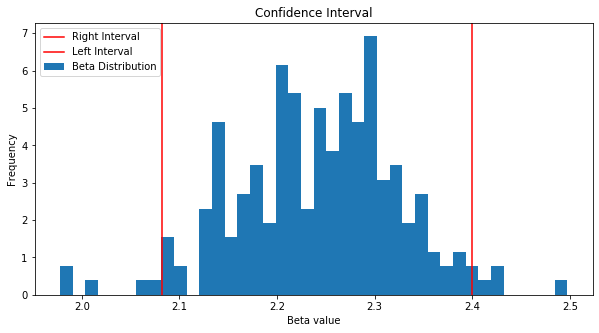

In [23]:
# function to plot CI
def plot_ci(beta_list, conf):
    plt.figure(figsize=(10, 5))
    plt.hist(beta_list, bins=40, label = "Beta Distribution", density=True)
    plt.axvline(conf[0], color='red', label="Right Interval")
    plt.axvline(conf[1], color='red', label="Left Interval")
    plt.xlabel("Beta value")
    plt.ylabel("Frequency")
    plt.title("Confidence Interval")
    plt.legend()
    plt.show()

# plot beta0 distribution and confidence intervals
plot_ci(beta0_list, beta0_ci)

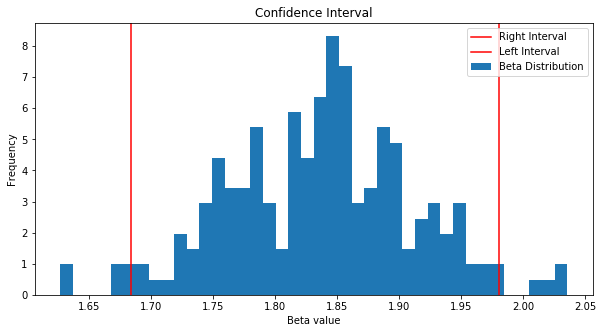

In [24]:
# plot beta1 distribution and confidence intervals
plot_ci(beta1_list, beta1_ci)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 4 </h2>    <br /><br />
<b> Question 4:   Finding the best model by k-fold cross-validation [15 points total]</b>
<br /><br />
<b>4.1</b> [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
<br /><br />
<b>Instructions</b><br />
- Select the max degree for computing the polynomial features. <br />
- For each degree in this range perform the following:<br />
    - Compute the polynomial features for the data.<br />
    - Perform k-fold cross validation with k=10<br />
    - Compute the polynomial features for the data.<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest MSE.
<br />
-Plot the train and validation score with respect to the degrees. Also indicate the mean+standard deviation and mean-standard deviation in the graph.
<br />

<b> Hints </b><br />
* Limit the maximum degree to 50. *<br />

* Use sklearn `cross_validate()` to perform cross validation. *<br /><br />

**4.2** [5 pts] Fitting the best model on the test data and compute the $MSE$ on the test set.<br /><br />

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Report the $MSE$ for the fitted models on both the training and test sets. <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve for the best model.<br />
- Print the coefficients of the model.<br /><br />

**Hints**<br />
* Sort the $x$ values before making your plots.*
<br /><br />

**Why this maybe a good idea?**<br />

- Avoids the dependence on the particular choice of a validation set<br /><br />

**Why this maybe a bad idea?**<br />

- The size of the dataset restricts the choice of the number of folds<br />
- Computationally more intensive<br /><br />
    
</div>

### Solutions

### 4.1

 Select the max degree for computing the polynomial features.
- For each degree in this range perform the following:
- Compute the polynomial features for the data.
- Perform k-fold cross validation with k=10
- Compute the polynomial features for the data.
- Compute the  𝑀𝑆𝐸  of the train and validation data and store in separate lists.
- Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest MSE.
-Plot the train and validation score with respect to the degrees. Also indicate the mean+standard deviation and mean-standard deviation in the graph.

In [25]:
# assign training and test set
x_train = train_df[['Spreading_factor']]
y_train = train_df.Perc_population

x_test = test_df[['Spreading_factor']]
y_test = test_df.Perc_population

# create empty lists to save train and validation error
training_error, validation_error = [], []


In [26]:
# define max degree
max_deg = 30

for i in range(max_deg):
    x_train_poly = PolynomialFeatures(i).fit_transform(x_train)
    scores = cross_validate(LinearRegression(fit_intercept=False), x_train_poly, y_train, scoring='neg_mean_squared_error', 
                            cv=10, return_train_score=True)
    
    # append training and validation errors
    training_error.append(-np.mean(scores['train_score']))
    validation_error.append(-np.mean(scores['test_score']))

In [27]:
# print results
best_deg_test = np.argmin(validation_error)
best_deg_train = np.argmin(training_error)
print(f"Best degree: {best_deg}")
print(f"Train MSE for best degree {best_deg_train}: {training_error[best_deg_train]}")
print(f"Validation MSE for best degree {best_deg_test}: {validation_error[best_deg_test]}")

NameError: name 'best_deg' is not defined

In [ ]:
# plot training and validation error along with degree
plt.figure(figsize=(10, 6))
plt.errorbar(range(30), training_error, label="Traning error")
plt.plot(range(30), validation_error, label="Validation error")
plt.axvline(best_deg_test, color='r', label="best degree(test)")
plt.axvline(best_deg_train, color='g', label="best degree(train)")
plt.ylim((2, 8))
plt.xlabel("Degree")
plt.ylabel("Error")
plt.title("Training and Validation MSE with different degrees")
plt.legend()
plt.show()

In [ ]:
# Print the best degree
print("The best degree that gives the lowest validation error is:", best_deg[0])


### 4.2

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Report the $MSE$ for the fitted models on both the training and test sets. <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve for the best model.<br />
- Print the coefficients of the model.<br /><br />

In [ ]:
# Compute the polynomial features
x_train_poly = PolynomialFeatures(best_degree[0]).fit_transform(x_train)
x_test_poly = PolynomialFeatures(best_degree[0]).fit_transform(x_test)

lreg = LinearRegression(fit_intercept=False)
lreg.fit(x_train_poly, y_train)
train_pred = lreg.predict(x_train_poly)
test_pred = lreg.predict(x_test_poly)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

In [ ]:
# Print the best MSE
print("Train mse with degree 8:", train_mse)
print("Test mse with degree 8:", test_mse)

In [ ]:
# Make a scatter plot of Spread factor vs. Precentage change in population for the specified degree.
plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test, color='green', label="actual values")
plt.scatter(x_test, test_pred, color='red', label="predicted values")
plt.title("Plot of Spread factor vs. Precentage change in population for degree 8")
plt.xlabel("Spread factor")
plt.ylabel("Precentage change in populatio")
plt.legend()
plt.show()

In [ ]:
lreg.coef_

In [ ]:
# coefficients of model
print("Model Coefficients")
print(lreg.coef_)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 5 </h2>    <br />

<b> Question 5:   Finding the most <b>consistent</b> model; use k-fold cross validation along with Bootstraps [2 points total]</b><br />
<br />



**5.1** [1 pt] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
<br /><br />
**Instructions**<br />
- Select the max degree for computing the polynomial features and number of bootstraps.<br />
- Create bootstraps of the data. For each bootstrap perform the following:<br />
    - For each degree in the range of max degree perform the following:<br />
        - Compute the polynomial features for the data.<br />
        - Perform k-fold cross validation with k=10<br />
        - Compute the polynomial features for the data.<br />
        - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
    - Select the degree for which the mean of the k-fold $MSE$ is the least.<br />
    - Store the best degree in a list<br />
- Plot a graph to show the frequency of the degree voted best for each bootstrap from the list from above steps.<br />
- The degree voted best the most times can be selected as the best degree.<br />
- Retrain on the entire test set and report the $MSE$ on the test set.<br />

<br />

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

<br /><br />
**Why this maybe a good idea?**
<br />
- Further avoids the dependence on the particular choice of a validation set<br />
- Allows for more analysis without data augmentation<br /><br />

**Why this maybe a bad idea?**<br />

- Computationally more intensive<br />
- The stochasticity in the choice of bootstraps may give unexpected results<br /><br />

**5.2** [0.5 pt] What are your observations? <br />

- Why do you see so much variance in the `best_degree` over the bootstraps?<br />
- What will you choose as your `best_degree` for the test set? <br /><br />

**5.3** [0.5 pt] Fitting the best model on the test data<br /><br />

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Print the MSE of the model <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well.<br />
- Print the coefficients of the model<br /><br />

**Hint**<br />
* Sort the $x$ values before making your plots.
    
    
</div>

### Solutions

### 5.1

**Instructions**<br />
- Select the max degree for computing the polynomial features and number of bootstraps.<br />
- Create bootstraps of the data. For each bootstrap perform the following:<br />
    - For each degree in the range of max degree perform the following:<br />
        - Compute the polynomial features for the data.<br />
        - Perform k-fold cross validation with k=10<br />
        - Compute the polynomial features for the data.<br />
        - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
    - Select the degree for which the mean of the k-fold $MSE$ is the least.<br />
    - Store the best degree in a list<br />
- Plot a graph to show the frequency of the degree voted best for each bootstrap from the list from above steps.<br />
- The degree voted best the most times can be selected as the best degree.<br />
- Retrain on the entire test set and report the $MSE$ on the test set.<br />

<br />

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

In [ ]:
# Read the dataset
train_df = pd.read_csv('data/bacteria_train.csv')
test_df = pd.read_csv('data/bacteria_test.csv')

numboots = 100
max_deg = 50
best_degrees = []

In [ ]:
# Bootstrap first & then find the best degree
for i in range(numboots):
    df = train_df.sample(frac=1, replace=True)
    x = df[['Spreading_factor']]
    y = df.Perc_population
    train_mse, test_mse = [], []
    degree_loss = {}
    
    for d in range(max_deg):
        x_poly = PolynomialFeatures(d).fit_transform(x)
        scores = cross_validate(LinearRegression(fit_intercept=False), x_poly, y, scoring='neg_mean_squared_error',
                                cv=10, return_train_score=True)
        
        # store train and validation MSE
        train_mse.append(-np.mean(scores['train_score']))
        test_mse.append(-np.mean(scores['test_score']))
        
        # store degree: validation_loss
        degree_loss[d] = -np.mean(scores['test_score'])
    # find best degree for which validation loss is minimum
    best_deg = [d for d in degree_loss if degree_loss[d] == min(degree_loss.values())]
    # store best degree in a list
    best_degrees.append(best_deg[0])

In [ ]:
len(best_degrees)

In [ ]:
# create a new dictionary to store best degree and its frequency
degree_freq = {}
for d in best_degrees:
    if d in degree_freq:
        degree_freq[d] += 1
    else:
        degree_freq[d] = 1
        
# plot degree and its frequency
plt.figure(figsize=(15, 6))
plt.bar(degree_freq.keys(), degree_freq.values())
plt.xticks(np.arange(0, 35, 1))
plt.xlabel("Best Degree")
plt.ylabel("Frequency")
plt.title("Best degrees and their frequencies")
plt.show()

In [ ]:
# assign predictor and response variable for test set
x_test = test_df[['Spreading_factor']]
y_test = test_df.Perc_population

# transform using best degree found above
x_test_poly = PolynomialFeatures(8).fit_transform(x_test)

# fit polynomial regression
lreg = LinearRegression(fit_intercept=False)
lreg.fit(x_test_poly, y_test)
test_pred = lreg.predict(x_test_poly)
test_mse = mean_squared_error(y_test, test_pred)
print("Test mse with degree 1:", test_mse)

### 5.2

**1. The variance in best degree is because of the use of bootstrap that gives us different kind of data in different iterations. Also bootstrap can choose same instance multiple times.**

**2. I will choose that degree for the test set, whichever has got the most vote (degree with highest vote frequency).**


### 5.3

In [ ]:
# assign training and test set
x_train = train_df[['Spreading_factor']]
y_train = train_df.Perc_population

x_test = test_df[['Spreading_factor']]
y_test = test_df.Perc_population

In [ ]:
# Select the best degree from the above exercise
best_degree = 8

In [ ]:
# Compute the polynomial features

x_train_poly = PolynomialFeatures(8).fit_transform(x_train)
x_test_poly = PolynomialFeatures(8).fit_transform(x_test)

In [ ]:
# Print the mse of the best model
lreg = LinearRegression(fit_intercept=False)
lreg.fit(x_train_poly, y_train)
train_pred = lreg.predict(x_train_poly)
test_pred = lreg.predict(x_test_poly)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
print("Test mse with degree 8:", test_mse)
print("Train mse with degree 8:", train_mse)

In [ ]:
# Make a scatter plot of Spread factor vs. Precentage change in population for the specified degree.
# sort data for beter visualization
x_test.values.sort(axis=0)
y_test.values.sort(axis=0)
test_pred.sort()

plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test, color='green', label="actual values")
plt.scatter(x_test, test_pred, color='red', label="predicted values")
plt.plot(x_test, test_pred, color='black', label="fit curve")
plt.title("Plot of Spread factor vs. Precentage change in population for degree 8")
plt.xlabel("Spread factor")
plt.ylabel("Precentage change in populatio")
plt.legend()
plt.show()

In [ ]:
# coefficients of model
print("Model Coefficients")
print(lreg.coef_)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 6 </h2>    <br />
<b> Question 6:   Improving model consistency [30 points total]</b>
<br /><br />
In the previous section, we compared **30** polynomial models to find the best degree. For each model of degree n, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. However, our **best model** could have been from any possible combination of the **30** degrees chosen.
<br />
For eg. a model with degrees `1,2,4,6`
<br />
The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularisation which *switches off* highly unstable degree coefficients and gives us the most efficient solution.
<br /><br />

**6.1** [10 pts] Find the best hyper-parameter `alpha`<br />

First, we will use `cross_validation` to find the the best regularisation parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
<br /><br />
**NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
<br /><br />
** Instructions**<br />
- Select the max degree of the polynomial, and make a list of `alpha` values.<br />
- For each value of `alpha`:<br />
    - Compute the polynomial features for the data.<br />
    - Create a `Lasso` regularisation model with the value of `alpha`<br />
    - Perform k-fold cross validation with k=10 using `Lasso` as model.<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.<br />
- Store the previously selected values as `best alpha` & print it.<br />

<br /><br />

** Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**6.2** [10 pts] Find the most significant degrees.<br />

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:<br />

For each bootstrap of the data, you will get some degrees that are **significant** ($\mid\beta_i\mid \lt 0.1 $). You would like to see, which degree coefficients are significant over several such iterations.<br />

As before, we use the `bacteria_train.csv` for cross validation.<br /><br />

NOTE: You are free to experiment with the number of bootstraps.<br /><br />


**Instructions**<br />
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap.<br />
- For each bootstrap:<br />
    - Take a sample the dataframe with `frac=1`.<br />
    - Train a **Lasso** model with the `best_alpha` computed above.<br />
    - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $).<br />
    - For each significant degree, update the count of that degree in `significant_degrees` .<br />
- Plot the count of degrees for each bootstrap as a bar plot.<br /><br />


**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**6.3** [5 pts] Compute the MSE on the test set<br />

Now, from the previous plot, you can see that only degrees upto 6 are consistently significant over several bootstraps. You will now retrain the *L1* regularised model on the entire data and find the test $MSE$<br /><br />

**Instructions**<br />

- Retrain the *regularised* model with *most frequent degree (most significant highest degree)* on the entire test set and report the $MSE$ on the test set.<br />
- Find the degrees of the polynomial that have cofficients with absolute value greater than 0.1<br />
- Compare the test $MSE$ computed in section 3, to the previous section and report your observations.<br />
- Plot a graph indicating your true and predicted data.<br />

**6.4** [5 pts] What are your Observations?<br />

- Is the `best_degree` computed above more consistent over the bootstraps? Why?<br />
- Which degree coefficients in your best fit model from above are significant? Why only some?<br />
- Is your test $MSE$ with regularisation comparable to the findings from previous section. If more, or less, by how much?<br />
- Is your current model more reliable? On what basis do you claim its robustness?<br />
    
    
</div>

### Solutions

### 6.1

** Instructions**<br />
- Select the max degree of the polynomial, and make a list of `alpha` values.<br />
- For each value of `alpha`:<br />
    - Compute the polynomial features for the data.<br />
    - Create a `Lasso` regularisation model with the value of `alpha`<br />
    - Perform k-fold cross validation with k=10 using `Lasso` as model.<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.<br />
- Store the previously selected values as `best alpha` & print it.<br />

In [ ]:
# assign predictor and response variable
x_train = train_df[['Spreading_factor']]
y_train = train_df.Perc_population

alphas = [1e-3, 1e-2, 1e+1, 1e+2, 1e+3]
max_degrees = 30
best_alphas = []
alpha_mse = {}
train_errorr, val_error = [], []

x_poly_train = PolynomialFeatures(max_degree).fit_transform(x_train)

for alpha in alphas:

    lasso = Lasso(alpha=alpha, max_iter=10000, normalize=True)
    scores = cross_validate(lasso, x_poly_train, y_train, scoring='neg_mean_squared_error', cv=10,
                            return_train_score=True)
    train_mse = np.mean(-scores['train_score'])
    val_mse = np.mean(-scores['test_score'])

    train_error.append(train_mse)
    val_error.append(val_mse)

    alpha_mse[alpha] = val_mse


best_alpha = [a for a in alpha_mse if alpha_mse[a] == min(alpha_mse.values())]

In [ ]:
# best alpha with min validation mse
print(f"The best alpha is: {best_alpha[0]} with validation MSE of: {min(val_error)}")

### 6.2

**Instructions**<br />
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap.<br />
- For each bootstrap:<br />
    - Take a sample the dataframe with `frac=1`.<br />
    - Train a **Lasso** model with the `best_alpha` computed above.<br />
    - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $).<br />
    - For each significant degree, update the count of that degree in `significant_degrees` .<br />
- Plot the count of degrees for each bootstrap as a bar plot.<br /><br />


**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />


In [ ]:
# make a dictionary


In [ ]:
# your code here


### 6.3

In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


### 6.4

**Your answer here**


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 7 </h2>    <br /><br />
<b> Question 7:   Display your best test MSEs for each sub section of the homework [10 points total]</b>
<br /><br />

**7.1** [10 pts] Convert the dictionary used to store the best MSE values from each section of the homework into a pandas dataframe. 
<br /><br />
- Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values are a bar chart.
</div>

### Solutions

### 7.1

In [ ]:
# your code here


In [ ]:
# your code here
